In [58]:
#Load Data:
import pandas as pd
import os
data1g = pd.read_csv("data"+os.sep+"part"+os.sep+"Suomi112_cpd_google.csv", encoding='utf-8-sig')
data1g.drop(['Unnamed: 0','userName', 'reviewId', 'at','reviewCreatedVersion','score','thumbsUpCount'], axis=1, inplace=True)
data1a = pd.read_csv("data"+os.sep+"part"+os.sep+"Suomi112_cpd_apple.csv", encoding='utf-8-sig')
data1a.drop(['Unnamed: 0','title', 'date', 'rating'], axis=1, inplace=True)
data2g = pd.read_csv("data"+os.sep+"part"+os.sep+"SosLive_cpd_google.csv", encoding='utf-8-sig')
data2g.drop(['Unnamed: 0','userName', 'reviewId', 'at','reviewCreatedVersion','score','thumbsUpCount'], axis=1, inplace=True)
data2a = pd.read_csv("data"+os.sep+"part"+os.sep+"SosLive_cpd_apple.csv", encoding='utf-8-sig')
data2a.drop(['Unnamed: 0','title', 'date', 'rating','developerResponse'], axis=1, inplace=True)
data = pd.concat([data1g,data1g,data2g,data2a])

In [59]:
data

,content,sentiment
0,"The program is clear to use, only some informa...",Positive
1,The cerebral infarction patient was asked to v...,Negative
2,The 112 icon disappeared from the phone screen...,Positive
3,Positioning accuracy 1300m when I'm at home. 👎,Negative
4,A comfortable device,Negative
...,...,...
331,Good App but it is not accessible for the deaf.,Positive
332,Good app,Positive
333,"However, the app lacks a lock or similar so th...",Positive
334,Crazy that this didn't come up sooner. But bet...,Positive


In [60]:
sentiment_dict = \
{
    "Positive" : 1,
    "Negative" : 0,
    "Neutral"  : 0,
}
data['sentiment'] = [sentiment_dict[sent] for sent in data['sentiment']]
#data = data.drop(data[data["sentiment"] == sentiment_dict["Neutral"]].index) # Remove Neutral Reviews
data

,content,sentiment
0,"The program is clear to use, only some informa...",1
1,The cerebral infarction patient was asked to v...,0
2,The 112 icon disappeared from the phone screen...,1
3,Positioning accuracy 1300m when I'm at home. 👎,0
4,A comfortable device,0
...,...,...
331,Good App but it is not accessible for the deaf.,1
332,Good app,1
333,"However, the app lacks a lock or similar so th...",1
334,Crazy that this didn't come up sooner. But bet...,1


In [61]:
import utils, importlib
importlib.reload(utils)
processor = utils.Processor()
processor.ini_dowload()
data_cpoy = data

[nltk_data] Downloading package stopwords to data/lib/stopwords...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to data/lib/wordnet...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to data/lib/omw...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [41]:
data['content'] = data['content'].apply(lambda x: processor.preprocess(str(x)))
data['content'] = data['content'].apply(lambda x: processor.tokenize(x))
data['content'] = data['content'].apply(lambda x: processor.remove_stopwords(x))
data['content'] = data['content'].apply(lambda x: processor.process_tokens(x))
data

,content,sentiment
0,"[program, clear, inform, resuscit, inform, var...",1
1,"[cerebr, infarct, patient, ask, verifi, phone,...",0
2,"[icon, disappear, phone, screen, although, ope...",1
3,"[posit, accuraci, home, thumb]",0
6,[swim],0
...,...,...
330,"[feel, good, exist, case, abus, someth, els, c...",0
331,"[good, access, deaf]",1
333,"[howev, lack, lock, similar, littl, kid, accid...",1
334,"[crazi, come, sooner, better, late, never]",1


In [155]:
data_cpoy = data

In [150]:
data = data_cpoy

In [151]:
from nltk.util import ngrams
import itertools
#Use Ngrams (both bigram and thrigrams):
data['ngrams'] = data['content'].apply(lambda x: list(itertools.chain(list(ngrams(x,2)),list(ngrams(x,3)))))
# Remove reviews with only one keyword:
data["ngrams"] = data["ngrams"].apply(lambda x: x if x != [] else "")
data = data[data.ngrams != ""]
data

,content,sentiment,ngrams
0,"[program, clear, inform, resuscit, inform, var...",1,"[(program, clear), (clear, inform), (inform, r..."
1,"[cerebr, infarct, patient, ask, verifi, phone,...",0,"[(cerebr, infarct), (infarct, patient), (patie..."
2,"[icon, disappear, phone, screen, although, ope...",1,"[(icon, disappear), (disappear, phone), (phone..."
3,"[posit, accuraci, home, thumb]",0,"[(posit, accuraci), (accuraci, home), (home, t..."
6,[swim],0,[]
...,...,...,...
330,"[feel, good, exist, case, abus, someth, els, c...",0,"[(feel, good), (good, exist), (exist, case), (..."
331,"[good, access, deaf]",1,"[(good, access), (access, deaf), (good, access..."
333,"[howev, lack, lock, similar, littl, kid, accid...",1,"[(howev, lack), (lack, lock), (lock, similar),..."
334,"[crazi, come, sooner, better, late, never]",1,"[(crazi, come), (come, sooner), (sooner, bette..."


In [ ]:
#random forest:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

['The program is clear to use, only some information such as resuscitation information for various situations could be added and the option to log out could be visible. An SOS emergency flash could also be necessary if the user can use it to indicate to others the need for help/a dangerous situation in the dark of night.',
 'The cerebral infarction patient was asked to verify the phone number when calling with the app. Fortunately, you knew how to call with a normal number.',
 'The 112 icon disappeared from the phone screen, although I can open the page!',
 "Positioning accuracy 1300m when I'm at home. 👎",
 "Don't swim",
 'Good job',
 'Good',
 "The app itself does what it's supposed to, but I deleted it after it called 10 times when I accidentally put the emergency number in my pocket. So changing the lock screen settings was not a good thing...",
 "It's good to have it installed just in case. An important application.",
 'Works flawlessly',
 "Very good and really necessary, if you're 

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(ngram_range= (2,3),stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(list(data['content']))

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [17]:
vectorizer.get_feature_names_out()

array(['000 downloads', '000 downloads save', '0046xxxxx 0xxxxxx', ...,
       'änd tindint ket', 'über taxi', 'über taxi emergency'],
      dtype=object)

In [18]:
X

<2070x21254 sparse matrix of type '<class 'numpy.float64'>'
	with 37489 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
y = data['sentiment']
clf.fit(X, y)


RandomForestClassifier(max_depth=3, random_state=0)

In [48]:
yy = clf.predict(vectorizer.transform(list(data['content'])))
yy

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
yy = clf.predict(vectorizer.transform([list(data['content'])[3]]))
yy

array([1])

In [29]:
data

,content,sentiment
0,"The program is clear to use, only some informa...",1
1,The cerebral infarction patient was asked to v...,0
2,The 112 icon disappeared from the phone screen...,1
3,Positioning accuracy 1300m when I'm at home. 👎,0
6,Don't swim,0
...,...,...
330,It feels good that the app exists in case I am...,0
331,Good App but it is not accessible for the deaf.,1
333,"However, the app lacks a lock or similar so th...",1
334,Crazy that this didn't come up sooner. But bet...,1


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y,yy)

0.7004830917874396

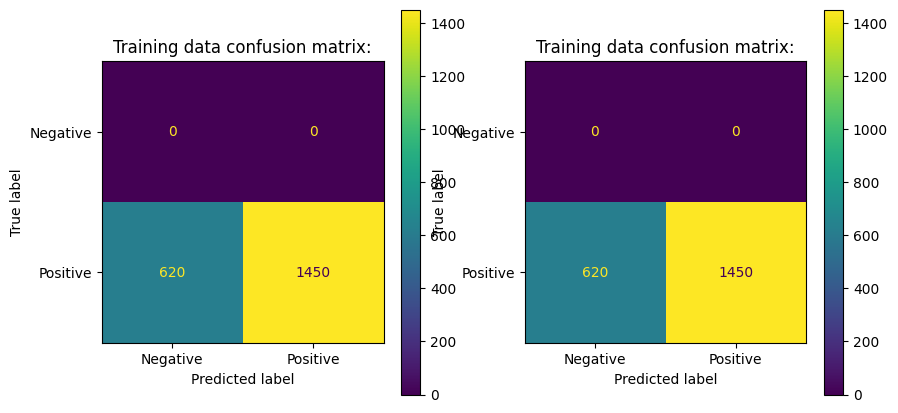

In [57]:
# Compute the confusion matrix using sklearn.metrics.confusion_matrix() function for training data and testing data respectively
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['happy', 'sad']
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#    3.1 Calculate the confusion matrix when classifying the training data

ax[0].title.set_text('Training data confusion matrix:')
cm = confusion_matrix(yy.ravel(),y)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
cmd.plot(ax=ax[0])
ax[1].title.set_text('Training data confusion matrix:')
cm2 = confusion_matrix(yy.ravel(),y)
cmd2 = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
cmd2.plot(ax=ax[1])


#    3.2 Calculate the confusion matrix when classifying the testing data
#ax[1].title.set_text('Testing data confusion matrix:')
#cm2 = confusion_matrix(testing_class.ravel(),predicted_test_class)
#cmd2 = ConfusionMatrixDisplay(cm2, display_labels=['happy', 'sad'])
#cmd2.plot(ax=ax[1])